# Social Media Analysis - Twitter US Airline Sentiment

Pekerjaan analisis sentimen tentang masalah masing-masing maskapai penerbangan utama AS. Data Twitter dihapus sejak Februari 2015 dan kontributor diminta untuk mengklasifikasikan tweet positif, negatif, dan netral, diikuti dengan mengkategorikan alasan negatif (seperti "penerbangan terlambat" atau "layanan kasar").

## Outline
<ul>
<li><a href="#a">1. Import Package</a></li>
<li><a href="#b">2. Import Data</a></li>
<li><a href="#c">3. Pre-Processing</a></li>
<li><a href="#d">4. Eksplorasi Data</a></li>
<li><a href="#e">5. Analisis Sentiment</a></li>    
</ul>

<a id='a'></a>
## 1. Import Package

In [23]:
import pandas as pd 
import numpy as np
import tweepy as tp

# Import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Import Reguler Expression 
import re

# Import textblob 
from textblob import TextBlob

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

# Lemazitation
from textblob import Word

# WordCloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afifah064126\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='b'></a>
## 2. Data Understanding
<br>
Data yang akan dianalsiis berasal dari web .[Crowdflower's Data for Everyone library](https://www.figure-eight.com/data-for-everyone/). Variabel-variabel yang terdapat pada data diantaranya yaitu :
- tweet_id : ID dari pengguna twitter
- airline_sentiment : sentiment analysis dari tweets
- airline_sentiment_confidence : confidence interval dari sentiment analysis terhadap tweets
- negativereason : sebuah frase yang menjadikan sebuah tweet menjadi nilai yang negative
- negativereason_confidence : confidence interval dari negativereason feature
- airline: nama perusahaan pesawat terbang (airline company)
- name: tipe pesawat terbang
- retweet count : jumlah dari retweet pada setiap tweet tweets
- text : tweets


In [51]:
# Import Data
df = pd.read_csv('D:/Python/Machine Learning/7. Acquiring External Data/Social Media Analysis/data/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


In [25]:
df.shape

(14485, 15)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
tweet_id                        14485 non-null int64
airline_sentiment               14485 non-null object
airline_sentiment_confidence    14485 non-null float64
negativereason                  9082 non-null object
negativereason_confidence       10416 non-null float64
airline                         14485 non-null object
airline_sentiment_gold          40 non-null object
name                            14485 non-null object
negativereason_gold             32 non-null object
retweet_count                   14485 non-null int64
text                            14485 non-null object
tweet_coord                     1007 non-null object
tweet_created                   14485 non-null object
tweet_location                  9798 non-null object
user_timezone                   9710 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


> Dikarenakan hanya data tweet yang akan digunakan, maka perlu membuat data frame baru agar dapat menghemat memori dan keefektifan analisis yang akan dilakukan.

In [27]:
df1 =  df[['text']]
df1.head()

,text
0,@JetBlue's new CEO seeks the right balance to ...
1,@JetBlue is REALLY getting on my nerves !! 😡😡 ...
2,@united yes. We waited in line for almost an h...
3,@united the we got into the gate at IAH on tim...
4,@SouthwestAir its cool that my bags take a bit...


<a id='c'></a>
## 3. Pre-Processing

In [28]:
# Drop duplicate tweet 
g_unique = set()
for item in df1['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    df2 = pd.DataFrame(tweet,columns = ['text'])

>#### 3.a. *Lower Casing*
Dalam Python, **lower()** adalah metode bawaan yang digunakan untuk penanganan data berbentuk string.
Metode **lower()** mengubah semua karakter huruf besar menjadi huruf kecil. Jika tidak ada huruf besar, itu mengembalikan string asli.

In [29]:
df2['text'] = df2['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['text'].head()

0    @southwestair i'm really craving your pretzels...
1                          @usairways last name pordes
2    @united thank you for the cheese platter and a...
3    @united you cancelled flight my flight. i wait...
4    @united old school ride home to lax from houst...
Name: text, dtype: object

>#### 3.b. *Punctuation Removal*
> Melakukan penghapusan semua tanda baca dari string. Jika karakternya adalah tanda baca, maka akan digantikan dengan string kosong.

In [30]:
df2['text'] = df2['text'].str.replace('[^\w\s]','')
df2.head()

,text
0,southwestair im really craving your pretzels p...
1,usairways last name pordes
2,united thank you for the cheese platter and ab...
3,united you cancelled flight my flight i wait i...
4,united old school ride home to lax from housto...


>#### 3.c. *Stopword Removal*
> *Stopword* merupakan kata yang umum digunakan (seperti "the", "a", "an", "in") yang diprogram untuk diabaikan oleh mesin pencari, baik saat mengindeks entri untuk pencarian maupun ketika mengambilnya sebagai hasilnya.

In [31]:
stop = stopwords.words('english')
df2['text'] = df2['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2['text'].head(10)

0    southwestair im really craving pretzels please...
1                           usairways last name pordes
2    united thank cheese platter abundance entertai...
3    united cancelled flight flight wait line get r...
4    united old school ride home lax houston flying...
5    americanair run engine troubleshoot issue boar...
6    jetblue month ago flight booked cancelled flig...
7    virginamerica going customer service anyway sp...
8                       southwestair many tickets left
9                                      usairways email
Name: text, dtype: object

>#### 3.d. *Frequents Word Removal*
Menghapus kata-kata yang biasanya muncul dari data. Dapat diketahui 10 kata yang paling sering muncul dalam data, lalu lakukan panggilan untuk menghapus atau mempertahankan.

In [32]:
freq = pd.Series(' '.join(df2['text']).split()).value_counts()[:10]
freq

united          4125
flight          3823
usairways       3036
americanair     2791
southwestair    2440
jetblue         2349
get             1326
cancelled       1034
thanks          1030
service          948
dtype: int64

>#### 3.e. *Rare Words Removal*
Menghapus kata-kata yang tidak biasa muncul dari data. Dapat diketahui 10 kata yang paling jarang muncul dalam data, lalu lakukan panggilan untuk menghapus atau mempertahankan.

In [33]:
rare_word = pd.Series(' '.join(df2['text']).split()).value_counts()[-10:]
rare_word

1135            1
older           1
twtr            1
mdwsan          1
silverstatus    1
convey          1
limbo           1
drenched        1
c29             1
150202000419    1
dtype: int64

In [34]:
rare_word = list(rare_word.index)
df2['text'] = df2['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df2['text'].head()

0               im really craving pretzels please send
1                                     last name pordes
2    thank cheese platter abundance entertainment o...
3    wait line rebooked im front make go another ga...
4    old school ride home lax houston flyingretro h...
Name: text, dtype: object

>#### 3.f. *Spelling Correction*
Jika terdapat kesalahan dalam penulisan, maka dengan menggunakan *spelling correction* akan memperbaiki kata-kata tersebut menjadi kata yang memiliki penulisan yang benar.

In [35]:
#Spelling correction
df2['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0               in really craving pretzels please send
1                                     last name sordes
2    thank cheese latter abundance entertainment op...
3    wait line revoked in front make go another gat...
4    old school ride home lax houston flyingretro h...
Name: text, dtype: object

>#### 3.g. *Tokenization*
Melakukkan split kata pada variabel text atau kata-kata tweet.

In [36]:
TextBlob(df2['text'][1]).words

WordList(['last', 'name', 'pordes'])

>#### 3.h. *Stemming*
>Fungsi dilakukan guna menjadikan kata pada tweet menjadi kata aslinya.

In [38]:
st = PorterStemmer()
df2['text'] = df2['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

>#### 3.f. *Lemazitation*
Lemmatization adalah proses pengelompokan bersama berbagai bentuk kata yang berbeda sehingga mereka dapat dianalisis sebagai satu item. Lemmatization mirip dengan stemming tetapi membawa konteks kata-kata.

In [40]:
df2['text'] = df2['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df2['text'].head()

0                    im realli crave pretzel plea send
1                                       last name pord
2    thank chees platter abund entertain option tim...
3    wait line rebook im front make go anoth gate l...
4    old school ride home lax houston flyingretro h...
Name: text, dtype: object

<a id='d'></a>
## 4. Eksplorasi Data

>Untuk mengetahui eksplorasi data, maka dapat melakukan visualisai menggunakan beberapa plot agar dapat mengetahui gambaran data secara visual.

<br>
> Berdasarkan Variabel airline_sentiment maka dapat dilihat persentase dari tiga sentimen (sentiment negative, neutral, dan positive)

In [52]:
cs = df['airline_sentiment'].value_counts()
cs

negative    9082
neutral     3069
positive    2334
Name: airline_sentiment, dtype: int64

<function matplotlib.pyplot.show>

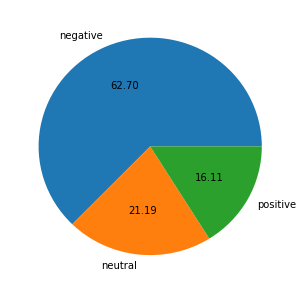

In [54]:
plt.figure(figsize=(5,5))
plt.pie(cs, labels=cs.index, autopct='%.2f')
plt.show

> Berdasarkan pie chart, maka dapat diketahui bahwa banyak tweet yang terindikasi memiliki sentiment negative. Hal ini dapat diduga bahwa para user yang melakukan tweet dengan subjek US Airline malakukan tweet dengan mengungkapkan hal negatif terhadap airline tersebut.

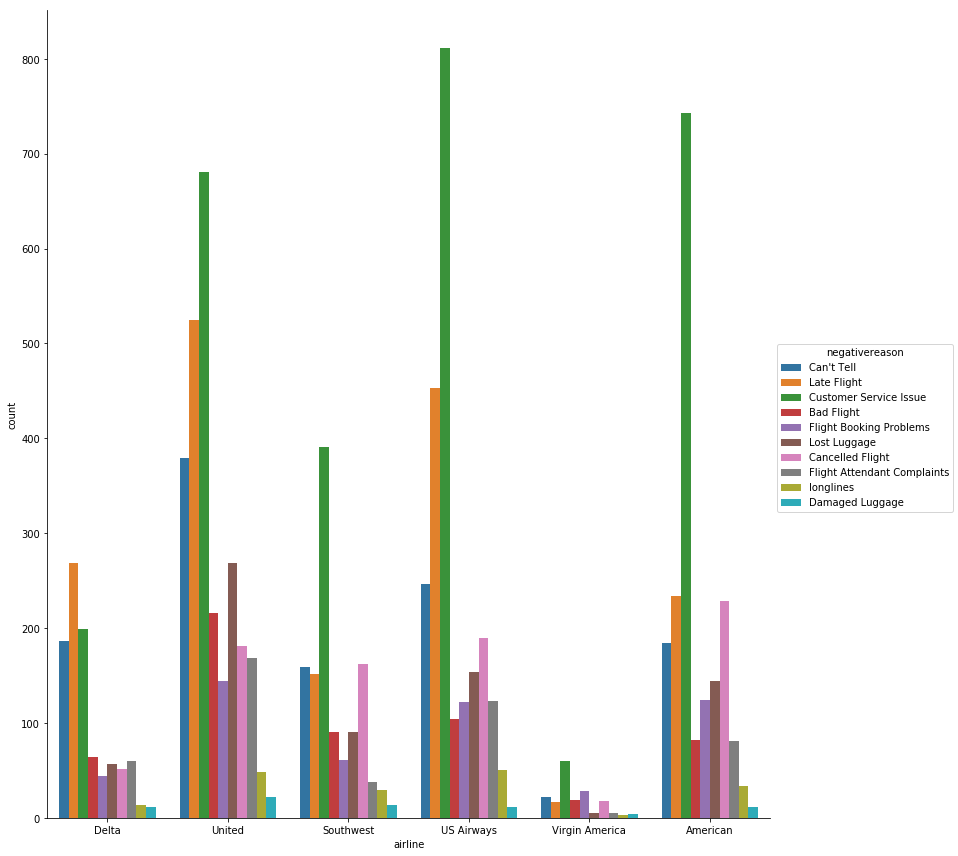

In [55]:
sns.factorplot(x = 'airline',data = df,kind = 'count',hue='negativereason',size=12,aspect=.9)
plt.show()

>Berdasarkan Bar Plot, dapat diketahui masalah-masalah apa saja yang menjadikan para user melakukan tweet yang mengindikasikan bersentiment negative berdasarkan Jenis Airline nya.

<a id='e'></a>
## 5. Analisis Sentiment

>#### WordCloud Tweets

In [41]:
wordc = "".join(df2.text.values)

In [42]:
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

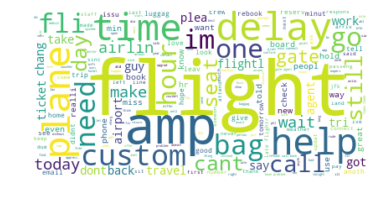

In [46]:
create_word_cloud(wordc)

> Berdasarkan wordcloud yang diperoleh, maka dapat diketahui frekuensi kata-kata apa saja yang sering menjadi tweet pada setiap tweet yang ter-record. Kata-kata yangs ering muncul atau memiliki frekuensi tinggi yaitu kata "flight", "amp, "delay", "time", "help" dall. Hal ini dilihat berdasarkan kata terbesar yang ada pada wordcloud tersebut. Dikarenakan data tweet yang digunakan merupakan data tweet Airline US. Maka dapat terindikasi bahwa banyak user yang mengupdate tweet pada saat "flight" nya mengalami "delay" hal ini juga didukung dengan adanya kata "time", "plane", "help" menjadi kata yang mendominasi. 

>#### WordCloud Sentimen Negatif 

In [47]:
#positive = df.loc[df['airline_sentiment'] == "positive"]
negative  = df.loc[df['airline_sentiment'] == "negative"]
#neutral  = df.loc[df['airline_sentiment'] == "neutral"]

In [48]:
negative = "".join(negative.negativereason.values)

In [49]:
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

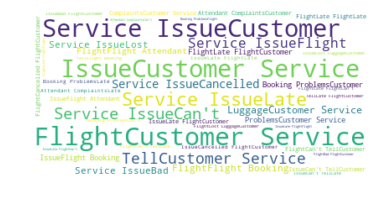

In [50]:
create_word_cloud(negative)

> Alasan yang menjadikan para user melakukan tweet dengan sentiment negatif dapat dilihat berdasarkan wordcloud di atas. Sehingga dapat diketahui terdapat banyak tweet mengenai US Airline berdasarkan para kostumer. Isu yang sering diangkat, diantaranya adalah mengenai customer service, issu late dan lain sebagainya.